# Proyecto Final - Series de Tiempo (Continuación)

### Repositorio del proyecto -> https://github.com/Ignacio-81/DS_Proyecto_Final

### A. Planteo:

Vamos a retomar el analisis y las Preguntas/Incognitas que planteamos en el Proyecto de Series de Tiempo que entregamos. (El mismo notebook se puede encontrar en el Repositorio). Luego del analisis respecto al flujo de vehiculos por los EPajes de Autopistas de Buenos Aires, entrenando nuestor modelo y mostrando las conclusiones dejamos planteado lo siguiente:

#### Vemos en nuestro grafico que a medida que disminuye el pago en efectivo , aumenta el pago de TELEPASE. Entonces.... Podemos analizar la evolucion con otro medios de pago? 

Pleanteamos una hipotesis de por que el flujo de pago en efectivo disminuye y aclaramos que en realidad lo que puede pasar es que los usuarios migran hacia otra forma de pago. En este caso comparamos con Telepeaje.

#### Planteamos las siguientes preguntas/dudas a resolver:
#### Que sucede si efectuamos la misma prediccion cambiando el metodo de pago para el ultimo semstre de 2019? 
##### POsible Respuesta a demostrar -> En teoria , los resultados esperados a nivel de Error y prediccion serian los mismos...

#### Podemos mejorar la performance del modelo utilizado? (Randon Forrest) 
##### Posible Respuesta -> Utilizar algun modelo ya estudiado y/o utilizar un modelo nunca estudiado (investigando cual podria ser para mejorar la performance de Random Forrest, justificando y explicando los resultados)

### B. Analisis: Preparación modelo.

##### Vamos a realizar la misma operacion que en el trabajo anterior para revisar la performance del modelo utilizado pero ahora introduciendo al informacion con el medoto de pago "Telepase" (recordamos que en trabajo anterior se recomendaba utilizar metodo de pago "Efectivo")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


In [4]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia
#mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'TELEPASE')
dataset = dataset[dataset.estacion=='Illia']

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
19,2019-01-01,1,Martes,Centro,Liviano,NO COBRADO,146
20,2019-01-01,1,Martes,Centro,Liviano,TELEPASE,59
21,2019-01-01,1,Martes,Centro,Pesado,TELEPASE,1
22,2019-01-01,1,Martes,Provincia,Liviano,NO COBRADO,147
23,2019-01-01,1,Martes,Provincia,Liviano,TELEPASE,106


In [5]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752552 entries, 0 to 752551
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dia             752552 non-null  object        
 1   sentido         752552 non-null  object        
 2   tipo_vehiculo   752552 non-null  object        
 3   forma_pago      752552 non-null  object        
 4   cantidad_pasos  752552 non-null  int64         
 5   fecha           752552 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 34.4+ MB


In [7]:
dataset[(dataset['forma_pago'] == 'T. DISCAPACIDAD') | (dataset['forma_pago'] == 'TARJETA DISCAPACIDAD')].cantidad_pasos.sum()

512442

In [8]:
data = {'Metodo_pago':  ['Telepase', 'Efectivo', 'Exento', 'Infraccion', 'Tarjeta Discapacidad', 'No Cobrado'],
        'Suma_total_pasos': [dataset[dataset.forma_pago == "TELEPASE"].cantidad_pasos.sum(), dataset[dataset.forma_pago == "EFECTIVO"].cantidad_pasos.sum(), 
        dataset[dataset.forma_pago == "EXENTO"].cantidad_pasos.sum(), dataset[dataset.forma_pago == "INFRACCION"].cantidad_pasos.sum(),
        dataset[dataset.forma_pago == "NO COBRADO"].cantidad_pasos.sum(), dataset[(dataset['forma_pago'] == 'T. DISCAPACIDAD') | (dataset['forma_pago'] == 'TARJETA DISCAPACIDAD')].cantidad_pasos.sum()]
        }

pasos_metpago = pd.DataFrame(data)

In [9]:
pasos_metpago

,Metodo_pago,Suma_total_pasos
0,Telepase,50526078
1,Efectivo,47865581
2,Exento,642523
3,Infraccion,340809
4,Tarjeta Discapacidad,2328340
5,No Cobrado,512442


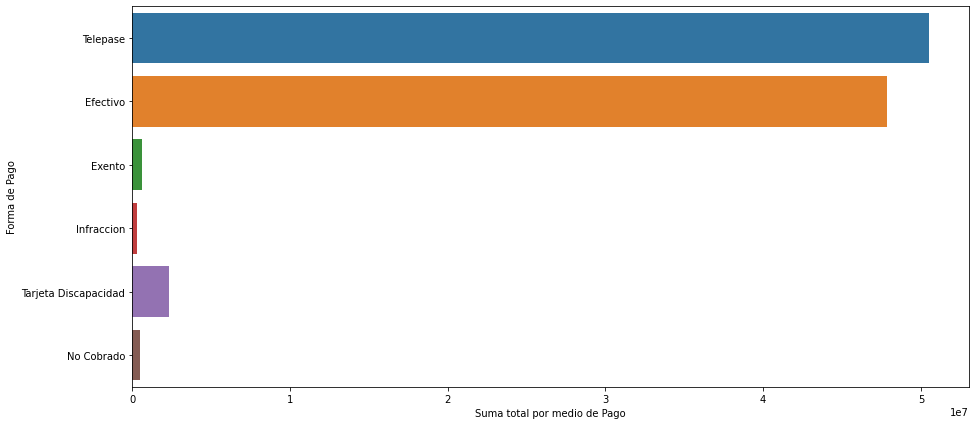

In [10]:
plt.figure(figsize=(15,7))
sns.barplot(y="Metodo_pago", x="Suma_total_pasos", data=pasos_metpago)
plt.ylabel('Forma de Pago')
plt.xlabel('Suma total por medio de Pago')
plt.show()

De nuestro analisis de datos podemos ver que el metodo relevante que podemos utlizar para nuestra comparacion es "Telepase" respecto al pago "Efectivo" dada la aproximacion en cantidades.

Vamos a aplicar los filtros y adaptaciones que realizamos en el trabajo anterior con menos detalle:

In [11]:
#Dejamos solamente la forma de Pago "TELEPASE"
dataset = dataset[dataset.forma_pago == 'TELEPASE']
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
#Aplicamos filtro a los valores muy bajos. Para esto vamos a INTERPOLAR los datos , primero convirtiendo en NaN y luego aplicando la interpolacion.
diario.cantidad_pasos[diario.cantidad_pasos < 18000] = np.nan
diario['cantidad_pasos'] = diario.cantidad_pasos.fillna(diario.cantidad_pasos.rolling(4,min_periods=1).mean())


In [12]:
diario = diario.dropna()

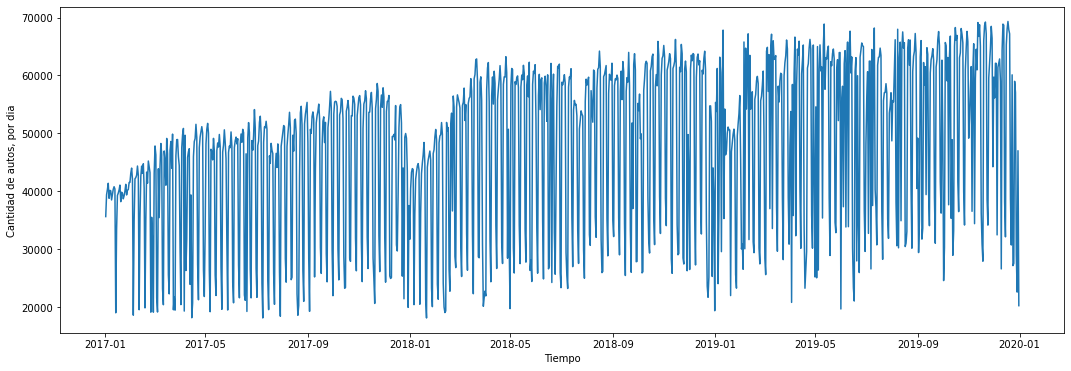

In [13]:
plt.figure(figsize = (18,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [14]:
diario.sort_values('cantidad_pasos').head(10)

,cantidad_pasos
fecha,
2018-01-21,18105.0
2017-07-09,18106.0
2017-04-15,18143.0
2017-07-30,18409.0
2017-08-20,18573.0
2017-02-04,18589.0
2017-01-14,18995.0
2018-02-12,19042.0
2017-02-25,19111.0


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='aditive')

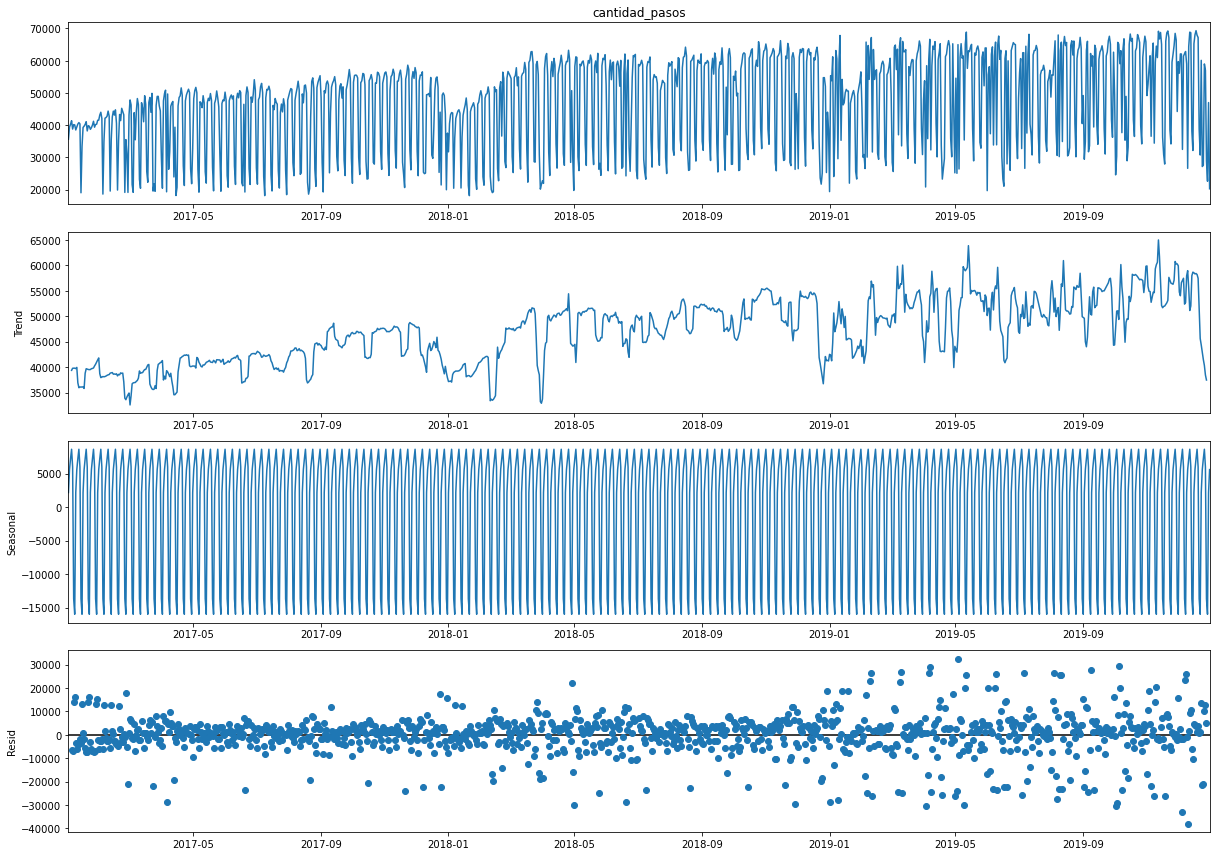

In [16]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [17,12]
result.plot()
plt.show()

Nota: Se puede observar una gran dispersion del ruido para 2019, esto puede impactar en nuestro modelo? Vamos analizar mas adelante...

(array([  1.,   1.,  11.,  14.,  22.,  15.,  11.,  13.,  61., 143., 223.,
        343., 124.,  39.,  29.,  11.,   9.,   5.,  11.,   2.]),
 array([-37960.70206346, -34433.87270129, -30907.04333911, -27380.21397694,
        -23853.38461477, -20326.55525259, -16799.72589042, -13272.89652824,
         -9746.06716607,  -6219.23780389,  -2692.40844172,    834.42092046,
          4361.25028263,   7888.07964481,  11414.90900698,  14941.73836915,
         18468.56773133,  21995.3970935 ,  25522.22645568,  29049.05581785,
         32575.88518003]),
 <BarContainer object of 20 artists>)

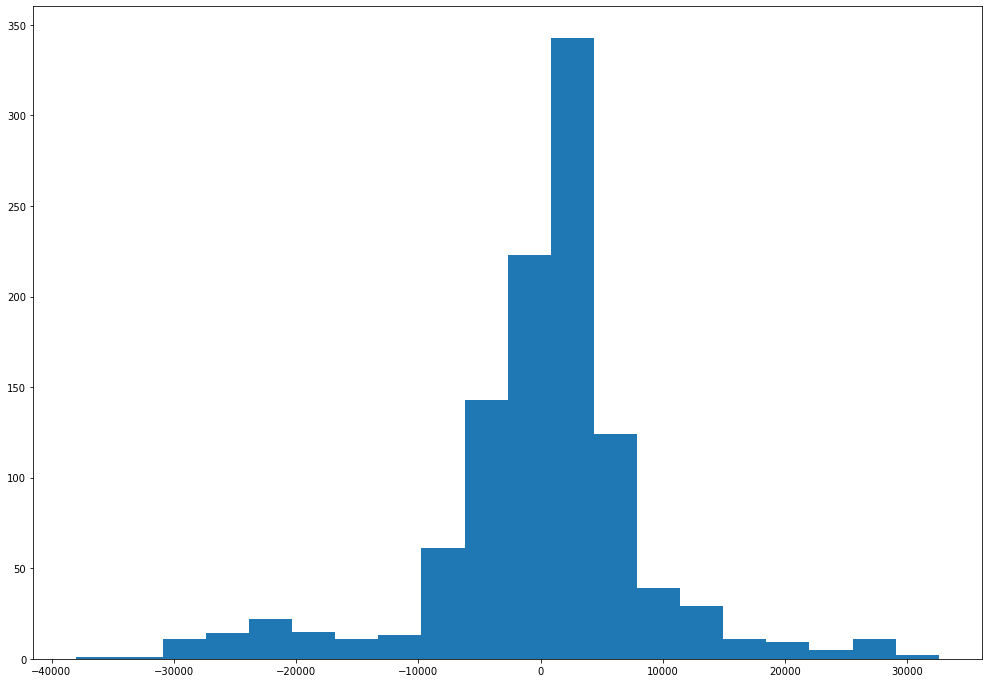

In [17]:
plt.hist(result.resid, bins=20)

### One Step PredictioN

Vamos a utilizar el metodo de One-step-prediction para predecir nuestro objetivo > 2do Semestre de 2019

In [18]:
diario.head()

,cantidad_pasos
fecha,
2017-01-02,35621.0
2017-01-03,39390.0
2017-01-04,40294.0
2017-01-05,41373.0
2017-01-06,38778.0


In [19]:
diario.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2017-01-02 to 2019-12-31
Freq: D
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cantidad_pasos  1094 non-null   float64
dtypes: float64(1)
memory usage: 17.1 KB


In [20]:
print(diario.shape)
type(diario)

(1094, 1)


pandas.core.frame.DataFrame

In [21]:
diario = diario.squeeze()
type(diario)

pandas.core.series.Series

In [22]:
look_back = 91  #Definimos 3 meses para nuestro look back ( 1/4 de año o 91 dias)

Creamos nuestros `X` e `y` con ceros para luego llenar con los datos:

In [23]:
N = diario.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1002, 91) (1002,)


In [24]:
for i in range(X.shape[0]):
    X[i,:] = diario.iloc[i:i+look_back]
    y[i] = diario.iloc[i+look_back]

Vamos a Seleccionar nuestor datos de TRAIN y TEST. Vamos a dejar todos los datos anteriores al ultimo trimestre de 2019 para TRAIN, y dejamos los datos del ultimo trimestr de 2019 para TEST. Asi podemos predecir sobre los datos del ultimo trimestre de 2019:

In [25]:
N_train = (2*365+273) - look_back # Utilizamos todos los datos antes del ultimo trimestre de 2019 para entrenar 
N_test = 91 # Vamos a dejar el ultimo trimestre de 2019 para datos de Test.
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(912, 91) (912,)
(90, 91) (90,)


Ahora vamos a entrenar nuestro modelo de RandomForrestRegressor:

In [26]:
from sklearn.ensemble import RandomForestRegressor

#rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = -1).fit(X_train,y_train)
rf = RandomForestRegressor(random_state=42)

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
# Grilla para Random Search
param_dist = {'n_estimators':list(range(20, 130)),
              'max_depth' : [2, 10, 100, 120, 135, 150],
             }

In [29]:
model_RS_rf = RandomizedSearchCV(rf, param_dist, n_iter=100, random_state=42, cv=5, n_jobs=-1)#,scoring='r2' )

model_RS_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [2, 10, 100, 120, 135,
                                                      150],
                                        'n_estimators': [20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, 30, 31,
                                                         32, 33, 34, 35, 36, 37,
                                                         38, 39, 40, 41, 42, 43,
                                                         44, 45, 46, 47, 48, 49, ...]},
                   random_state=42)

In [30]:
print("Mejores parametros: "+str(model_RS_rf.best_params_))
print("Mejor Score: "+str(model_RS_rf.best_score_)+'\n')
print("Mejor Score: "+str(model_RS_rf.best_estimator_)+'\n')
#print("Mejor Scorer: "+str(model_RS_rf.scorer_)+'\n')

Mejores parametros: {'n_estimators': 112, 'max_depth': 135}
Mejor Score: 0.5282263807848383

Mejor Score: RandomForestRegressor(max_depth=135, n_estimators=112, random_state=42)



In [31]:
def ver_rmse_r2 (modelo):
    
    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print(f'Raíz del error cuadrático medio en Train: {mae_train}')
    print(f'Raíz del error cuadrático medio en Test: {mae_test}')
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'R2, Coeficiente de determinacion en Train: {r2_train}')
    print(f'R2, Coeficiente de determinacion en Test: {r2_test}')     

In [32]:
ver_rmse_r2(model_RS_rf)

Raíz del error cuadrático medio en Train: 3306.824522173523
Raíz del error cuadrático medio en Test: 13198.906925122263
Raíz del error cuadrático medio en Train: 2235.4719856281326
Raíz del error cuadrático medio en Test: 12001.423544973544
R2, Coeficiente de determinacion en Train: 0.9467718732315074
R2, Coeficiente de determinacion en Test: 0.21003930843222152


#### Recordamos los mejoras resultados del modelo utilizado en el trabajo anterior:

![Resultados](Resultado_Proyecto_3.JPG)

In [33]:
rf = RandomForestRegressor(n_estimators=112, max_depth=135, random_state=42).fit(X_train,y_train)

In [34]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [35]:
ver_rmse_r2(rf)

Raíz del error cuadrático medio en Train: 3306.824522173523
Raíz del error cuadrático medio en Test: 13198.906925122263
Raíz del error cuadrático medio en Train: 2235.4719856281326
Raíz del error cuadrático medio en Test: 12001.423544973544
R2, Coeficiente de determinacion en Train: 0.9467718732315074
R2, Coeficiente de determinacion en Test: 0.21003930843222152


#### Evaluando el modelo vemos que : el error tanto en Test como en Train es mayor que el resultado del proyecto anterior utilizanod los datos filtrados de "Pago en Efectivo". Pero, por otro lado , vemos que el valor de r2 en 'TRAIN' sigue pareciendose en el buen valor pero en 'TEST' sigue siendo realmente malo. 

#### Podemos , entonces, confirmar nuestra teoria , mas alla de expandir un poco mas el analisis exploratorio respecto al proyecto anterior, que el resultado de la prediccion para "Pago con Telepase" va a contener un grado de error MAYOR que para los datos filtrados por "FOrma de Pago Efectivo" en el 2do Semestre de 2019.

Vamos a Graficar Nuestra prediccion :

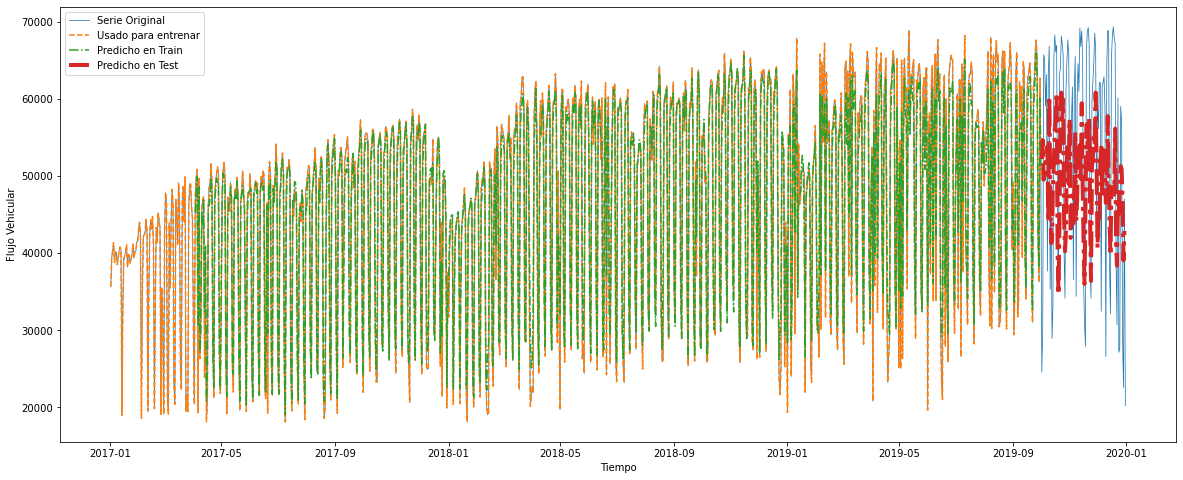

In [36]:
plt.figure(figsize=(20,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[:N_train + look_back], diario[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo Vehicular')
plt.show()

Vamos a analizar la distribucion del error del modelo. Se puede ver la distribucion del error para cada modelo. Tambien en el grafico a la derecha se puede ver donde fallaria el modelo, y_test contra y_predicho 

Raíz del error cuadrático medio en Train: 3306.824522173523
Raíz del error cuadrático medio en Test: 13198.906925122263


C:\Users\Usuario\miniconda3\envs\prophet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\prophet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


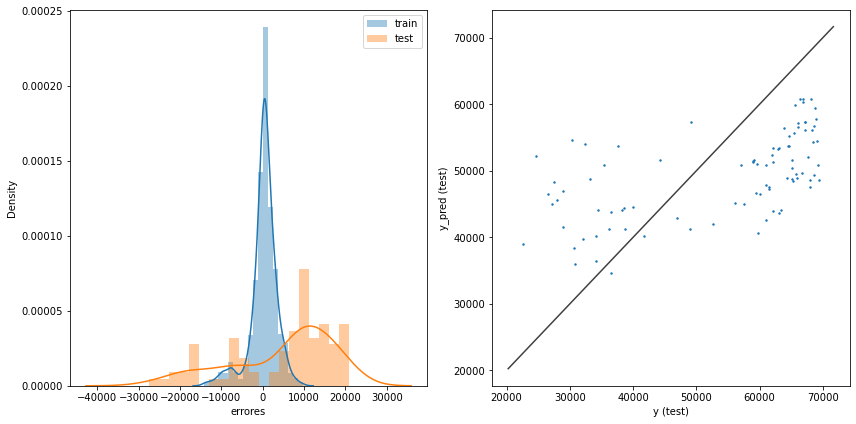

In [37]:
from sklearn.metrics import mean_squared_error
import seaborn as sns

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

if rmse_train> rmse_test:
    relacion=(rmse_test/rmse_train)*100
else:
    relacion=(rmse_train/rmse_test) *100 

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')


plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

#### Como en el modelo del trabajo anterior, podemos ver en el grafico de Y_test contra los datos predichos (y_pred) que para valores "altos" el modelo tiene mayor diferencia y en esta zona, va a fallar. Las predicciones estan acumuladas en un rango , hay mucha dispersion entre y_test e Y_predict, mucho mas aún , que en el modelo del proyecto anterior.

##### Vamos a probar con un modelo "ya conocido" por nosotros para ver si podemos mejorar nuestra prediccion:

#### EN este caso vamos a utilizar XGBoost Regressor

In [38]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

model_XGB = xgb.XGBRegressor()
#param_search = {'max_depth' : [3, 5]}
param_search = {'n_estimators':list(range(1, 50)), 
              'max_depth' : [0, 1, 3, 4, 8]}

tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model_XGB, cv=tscv,param_grid=param_search, n_jobs=-1)#,scoring='neg_mean_squared_error')
gsearch.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth...
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    sub

In [39]:
print("Mejores parametros: "+str(gsearch.best_params_))
print("Mejor Score: "+str(gsearch.best_score_)+'\n')
print("Mejor Score: "+str(gsearch.best_estimator_)+'\n')
#print("Mejor Scorer: "+str(model_RS_rf.scorer_)+'\n')

Mejores parametros: {'max_depth': 1, 'n_estimators': 15}
Mejor Score: 0.4362427418004283

Mejor Score: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=1, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=15, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)



In [40]:
y_train_pred = gsearch.predict(X_train)
y_test_pred = gsearch.predict(X_test)

In [41]:
y_train_pred.shape

(912,)

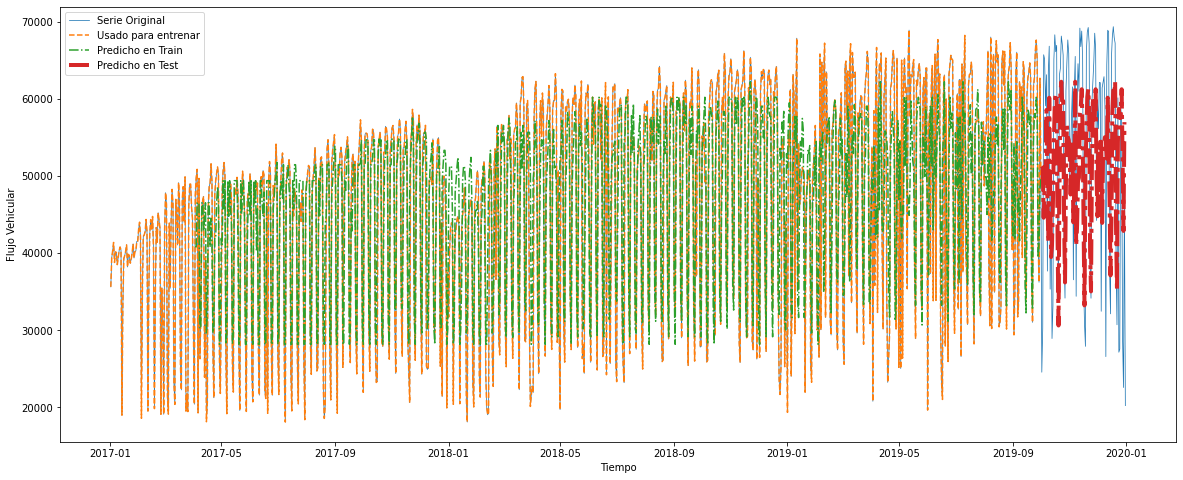

In [42]:
plt.figure(figsize=(20,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[:N_train + look_back], diario[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo Vehicular')
plt.show()

In [43]:
ver_rmse_r2(gsearch)

Raíz del error cuadrático medio en Train: 8829.505017867687
Raíz del error cuadrático medio en Test: 12258.717686822307
Raíz del error cuadrático medio en Train: 6167.254019753975
Raíz del error cuadrático medio en Test: 10197.892787905093
R2, Coeficiente de determinacion en Train: 0.6205176346849188
R2, Coeficiente de determinacion en Test: 0.31857253210851233


Raíz del error cuadrático medio en Train: 8829.505017867687
Raíz del error cuadrático medio en Test: 12258.717686822307


C:\Users\Usuario\miniconda3\envs\prophet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\prophet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


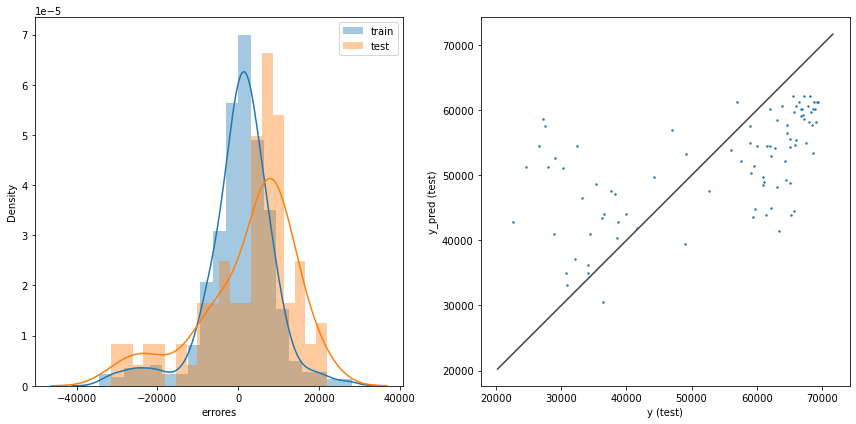

In [44]:
from sklearn.metrics import mean_squared_error
import seaborn as sns

y_train_pred = gsearch.predict(X_train)
y_test_pred = gsearch.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

if rmse_train> rmse_test:
    relacion=(rmse_test/rmse_train)*100
else:
    relacion=(rmse_train/rmse_test) *100 

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')


plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

##### Conclusión: Vemos una leve mejoria en las predicciones y el coeficiente r2 para los datos de "Test" , pero aun el r2 sigue siendo muy "malo". Por otro lado vemos un aumento del error en Train . 

#### A Continuación vamos a epxplorar 2 nuevos Modelos, SKForescast que viene implementado de la libreria SKLEarn y Prophet , el cual es la libreria de Facebook para el uso en series de tiempo

## Skforecast

In [45]:
#pip install skforecast --user

In [46]:
# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import time_series_spliter
from skforecast.model_selection import cv_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import backtesting_forecaster_intervals

In [47]:
diario

fecha
2017-01-02    35621.0
2017-01-03    39390.0
2017-01-04    40294.0
2017-01-05    41373.0
2017-01-06    38778.0
               ...   
2019-12-27    57035.0
2019-12-28    28983.0
2019-12-29    22577.0
2019-12-30    47001.0
2019-12-31    20232.0
Freq: D, Name: cantidad_pasos, Length: 1094, dtype: float64

In [48]:
# Preparación del dato
# ==============================================================================
diario.index = pd.to_datetime(diario.index, format='%Y/%m/%d')


In [49]:
diario

fecha
2017-01-02    35621.0
2017-01-03    39390.0
2017-01-04    40294.0
2017-01-05    41373.0
2017-01-06    38778.0
               ...   
2019-12-27    57035.0
2019-12-28    28983.0
2019-12-29    22577.0
2019-12-30    47001.0
2019-12-31    20232.0
Freq: D, Name: cantidad_pasos, Length: 1094, dtype: float64

In [50]:
diario = diario.sort_index()

In [51]:
# Verificar que un índice temporal está completo
# ==============================================================================
(diario.index == pd.date_range(start=diario.index.min(),
                              end=diario.index.max(),
                              freq=diario.index.freq)).all()

True

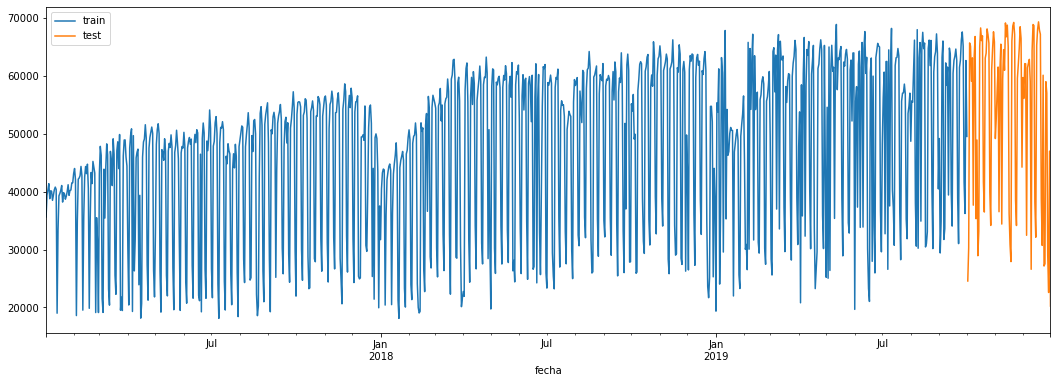

In [52]:
# Separación datos train-test
# ==============================================================================
steps = 91 #Definimos nuestro 91 dias (3 meses para los datos de test para evaluar el modelo)
datos_train = diario[:-steps]
datos_test  = diario[-steps:]

fig, ax=plt.subplots(figsize=(18, 6))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
ax.legend();

In [53]:
# Crear y entrenar forecaster
# ==============================================================================
forecaster_rf = ForecasterAutoreg(
                    regressor=RandomForestRegressor(random_state=123),
                    lags= 24 # VEntana temporal de 18 lags o sea 18 dias anteriores para poder predecir 
                )

forecaster_rf.fit(y=datos_train)

forecaster_rf

=======================ForecasterAutoreg=======================
Regressor: RandomForestRegressor(random_state=123)
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Exogenous variable: False, None
Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}

In [54]:
# Predecimos los datos de Test
# ==============================================================================
steps = 91
predicciones = forecaster_rf.predict(steps=steps)
# Se añade el índice temporal a las predicciones
predicciones = pd.Series(data=predicciones, index=datos_test.index)
predicciones.head()

fecha
2019-10-02    50614.843333
2019-10-03    49864.533333
2019-10-04    45477.060000
2019-10-05    50381.860000
2019-10-06    45268.815000
Freq: D, dtype: float64

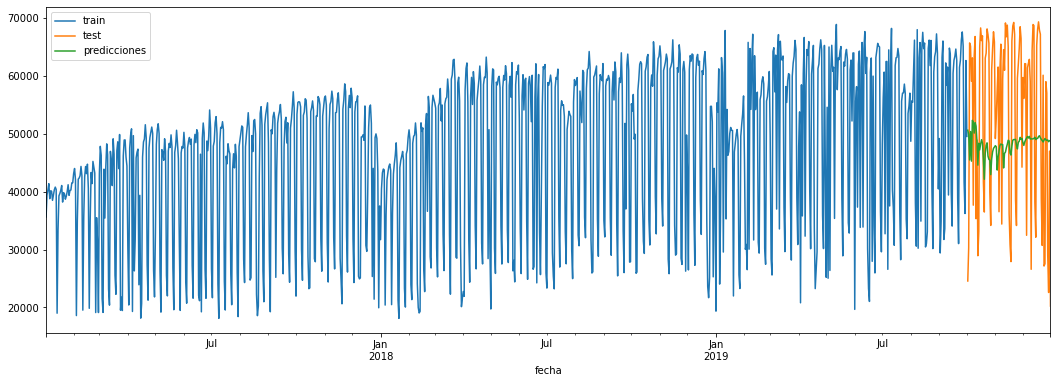

In [55]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(18, 6))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [56]:
from sklearn.metrics import mean_squared_error,r2_score
rmse_test = np.sqrt(mean_squared_error(datos_test, predicciones))
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
r2_test = r2_score(datos_test, predicciones)
print(f'R2, Coeficiente de determinacion en Test: {r2_test}')  

Raíz del error cuadrático medio en Test: 16161.58262788629
R2, Coeficiente de determinacion en Test: -0.13324016561595076


In [57]:
# Grid search de hiperparámetros
# ==============================================================================
forecaster_rf = ForecasterAutoreg(
                    regressor = RandomForestRegressor(random_state=42, n_jobs=-1),
                    lags      = 12 # Este valor será remplazado en el grid search
                 )

param_grid = {'n_estimators':[50, 100, 350, 550], 
              'max_depth' : [2, 5, 10]}

# Lags utilizados como predictores
lags_grid = [184, 223]

resultados_grid = grid_search_forecaster(
                        forecaster  = forecaster_rf,
                        y           = datos_train,
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 10,
                        method      = 'cv',
                        metric      = 'mean_squared_error',
                        initial_train_size    = int(len(datos_train)*0.5),
                        allow_incomplete_fold = False,
                        return_best = True,
                        verbose     = False
                   )

2021-11-30 08:59:04,481 root       INFO  Number of models compared: 24
loop lags_grid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [44:29<00:00, 1334.79s/it]
2021-11-30 09:43:34,078 root       INFO  Refitting `forecaster` using the best found parameters and the whole data set: 
lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 

Revisamos la tabla con la mejor combinacion de parametros y el mejor score:


In [58]:
resultados_grid

,lags,params,metric,max_depth,n_estimators
14,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 2, 'n_estimators': 350}",1.262042e+08,2,350
15,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 2, 'n_estimators': 550}",1.268903e+08,2,550
13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 2, 'n_estimators': 100}",1.275531e+08,2,100
12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 2, 'n_estimators': 50}",1.289690e+08,2,50
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 2, 'n_estimators': 100}",1.316853e+08,2,100
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 2, 'n_estimators': 350}",1.323728e+08,2,350
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 2, 'n_estimators': 550}",1.323901e+08,2,550
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 2, 'n_estimators': 50}",1.332638e+08,2,50
17,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",1.490798e+08,5,100
16,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 50}",1.496692e+08,5,50


Vemos puntualmente el mejor valor de Lags:

In [82]:
resultados_grid.lags[14]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [83]:
regressor = RandomForestRegressor(max_depth=2, n_estimators=50, random_state=123)
forecaster_rf = ForecasterAutoreg(
                    regressor = regressor,
                    lags      = 223
                )

forecaster_rf.fit(y=datos_train)

In [84]:
# Predicciones
# ==============================================================================
predicciones = forecaster_rf.predict(steps=steps)
# Se añade el índice a las predicciones
predicciones = pd.Series(data=predicciones, index=datos_test.index)

In [85]:
# Importancia predictores
# ==============================================================================
impotancia = forecaster_rf.get_feature_importances()
dict(zip(forecaster_rf.lags, impotancia))

{1: 0.042403969263755295,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.001570694772764317,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0015224895301497187,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.001881389378819704,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.26772943059594423,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.00145158532661898,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.10624065348003961,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.09594375041923685,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.0,
 71: 0.0,
 72: 0.0,
 73: 0.0,
 74: 0.0,
 75: 0.0,
 76: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.0,
 81: 0.0016585479553596775,
 82: 0.0,
 83: 0.0,
 84: 0.0068861707666370816,


In [86]:
from sklearn.metrics import mean_squared_error,r2_score
rmse_test = np.sqrt(mean_squared_error(datos_test, predicciones))
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
r2_test = r2_score(datos_test, predicciones)
print(f'R2, Coeficiente de determinacion en Test: {r2_test}')  

Raíz del error cuadrático medio en Test: 13815.681292428359
R2, Coeficiente de determinacion en Test: 0.17186946700158767


Probamos una combinacion de parametros a prueba y error para ver si podemos mejorar

In [64]:
regressor = RandomForestRegressor(max_depth=2, n_estimators=500, random_state=123)

forecaster_rf = ForecasterAutoreg(
                    regressor = regressor,
                    lags      = 284
                    
                )

forecaster_rf.fit(y=datos_train)

In [65]:
# Predicciones
# ==============================================================================
predicciones = forecaster_rf.predict(steps=steps)
# Se añade el índice a las predicciones
predicciones = pd.Series(data=predicciones, index=datos_test.index)

In [66]:
rmse_test = np.sqrt(mean_squared_error(datos_test, predicciones))
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
r2_test = r2_score(datos_test, predicciones)
print(f'R2, Coeficiente de determinacion en Test: {r2_test}')  

Raíz del error cuadrático medio en Test: 13571.921681770518
R2, Coeficiente de determinacion en Test: 0.20083422844933219


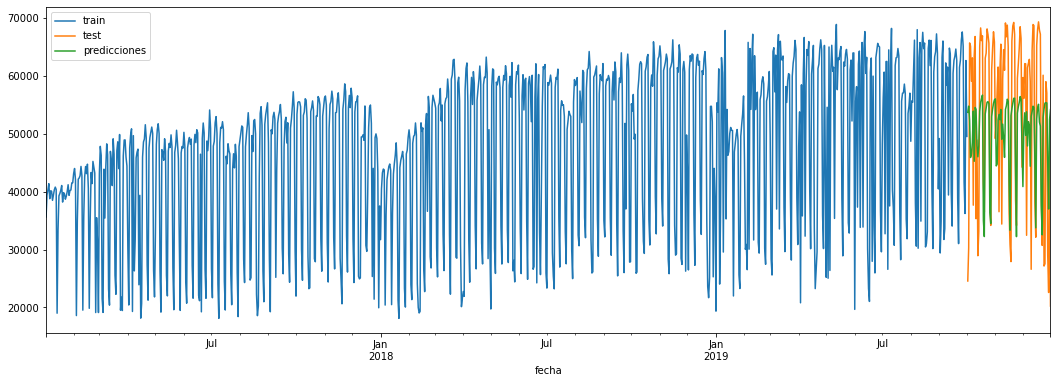

In [67]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(18, 6))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

## Prophet

In [68]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)
from fbprophet import Prophet
from pandas import DataFrame

2021-11-30 09:43:51,549 fbprophet.plot ERROR Importing plotly failed. Interactive plots will not work.


Prophet 0.7.1


In [69]:
print(type(diario))
print(diario)

<class 'pandas.core.series.Series'>
fecha
2017-01-02    35621.0
2017-01-03    39390.0
2017-01-04    40294.0
2017-01-05    41373.0
2017-01-06    38778.0
               ...   
2019-12-27    57035.0
2019-12-28    28983.0
2019-12-29    22577.0
2019-12-30    47001.0
2019-12-31    20232.0
Freq: D, Name: cantidad_pasos, Length: 1094, dtype: float64


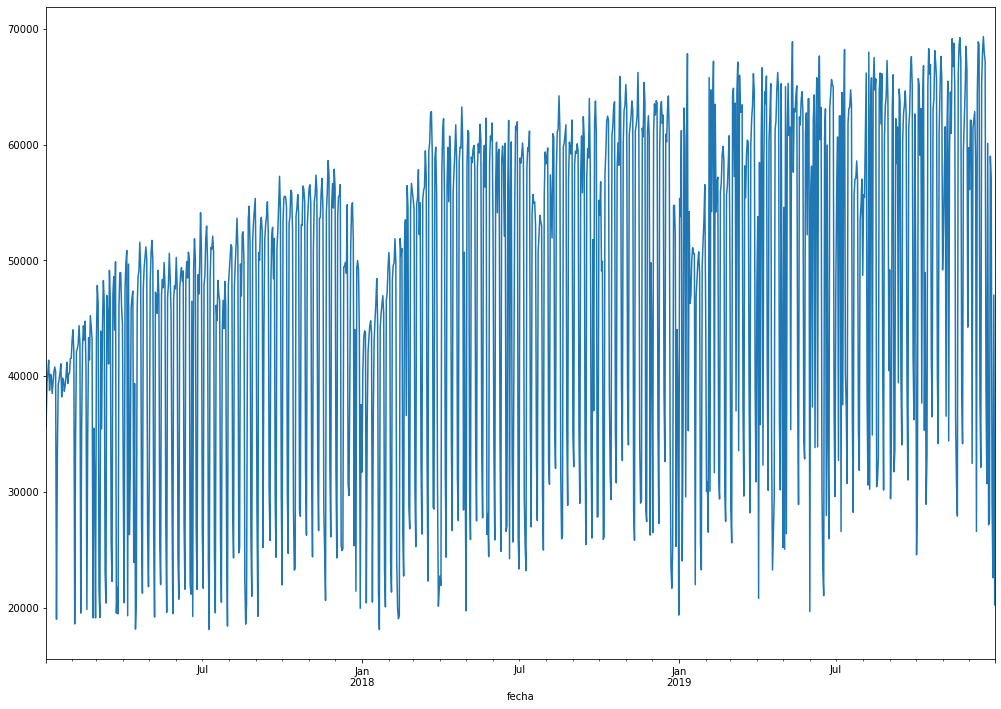

In [70]:
from matplotlib import pyplot
diario.plot()
pyplot.show()

In [71]:
# Convertimos el Dataframe en el formato que requiere Prophet:
diario_p = diario.reset_index()
print(diario_p)

          fecha  cantidad_pasos
0    2017-01-02         35621.0
1    2017-01-03         39390.0
2    2017-01-04         40294.0
3    2017-01-05         41373.0
4    2017-01-06         38778.0
...         ...             ...
1089 2019-12-27         57035.0
1090 2019-12-28         28983.0
1091 2019-12-29         22577.0
1092 2019-12-30         47001.0
1093 2019-12-31         20232.0

[1094 rows x 2 columns]


In [72]:
diario_p.columns = ['ds', 'y']
diario_p

,ds,y
0,2017-01-02,35621.0
1,2017-01-03,39390.0
2,2017-01-04,40294.0
3,2017-01-05,41373.0
4,2017-01-06,38778.0
...,...,...
1089,2019-12-27,57035.0
1090,2019-12-28,28983.0
1091,2019-12-29,22577.0
1092,2019-12-30,47001.0


In [73]:
# define the model
model_ph = Prophet(daily_seasonality=True)

In [74]:
# fit the model
model_ph.fit(diario_p)

In [75]:
# define the period for which we want a prediction
future = list()
date = datetime.datetime(2019,10,1)
for i in range(1, 92):
    date += datetime.timedelta(days=1)
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [76]:
future

,ds
0,2019-10-02
1,2019-10-03
2,2019-10-04
3,2019-10-05
4,2019-10-06
...,...
86,2019-12-27
87,2019-12-28
88,2019-12-29
89,2019-12-30


HAcemos una prediccion sobre los utimos 91 dias y lo comparamos con los datos originales:

In [77]:
# use the model to make a forecast
forecast = model_ph.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 2019-10-02  59791.537987  47171.208256  71715.296554
1 2019-10-03  61033.066552  48328.521670  73692.871769
2 2019-10-04  58236.478703  46389.470460  70295.729869
3 2019-10-05  38449.467651  27396.849693  50267.374612
4 2019-10-06  36051.789803  24080.552325  48341.373203


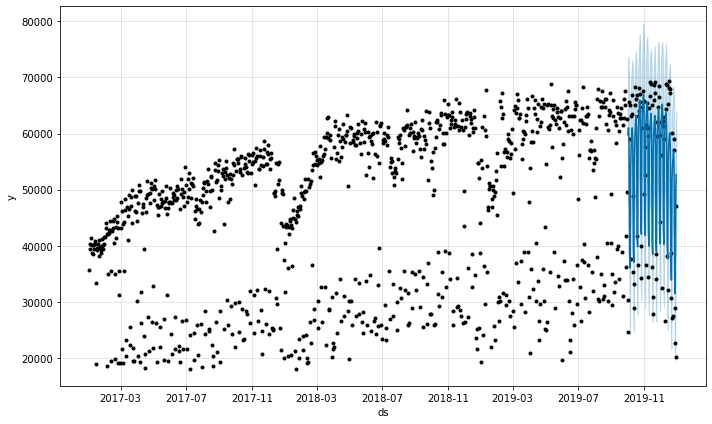

In [78]:
# plot forecast
model_ph.plot(forecast)
pyplot.show()

Evaluando el modelo:

In [79]:
# create test dataset, remove last 12 months
train = diario_p.drop(diario_p.index[-91:])
print(train.tail(10))

             ds        y
993  2019-09-22  31019.0
994  2019-09-23  61467.0
995  2019-09-24  62708.0
996  2019-09-25  66188.0
997  2019-09-26  67589.0
998  2019-09-27  65144.0
999  2019-09-28  41676.0
1000 2019-09-29  36221.0
1001 2019-09-30  62648.0
1002 2019-10-01  49540.0


In [80]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# calculate MAE between expected and predicted values for december
y_true = diario_p['y'][-91:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_true, y_pred))
print('MAE: %.3f' % mae)
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
r2_test = r2_score(y_true, y_pred)
print(f'R2, Coeficiente de determinacion en Test: {r2_test}')   

MAE: 9504.746
Raíz del error cuadrático medio en Test: 13528.903249430621
R2, Coeficiente de determinacion en Test: 0.20589237345787437


Comparamos los datos reales contra la predicción obtenida:

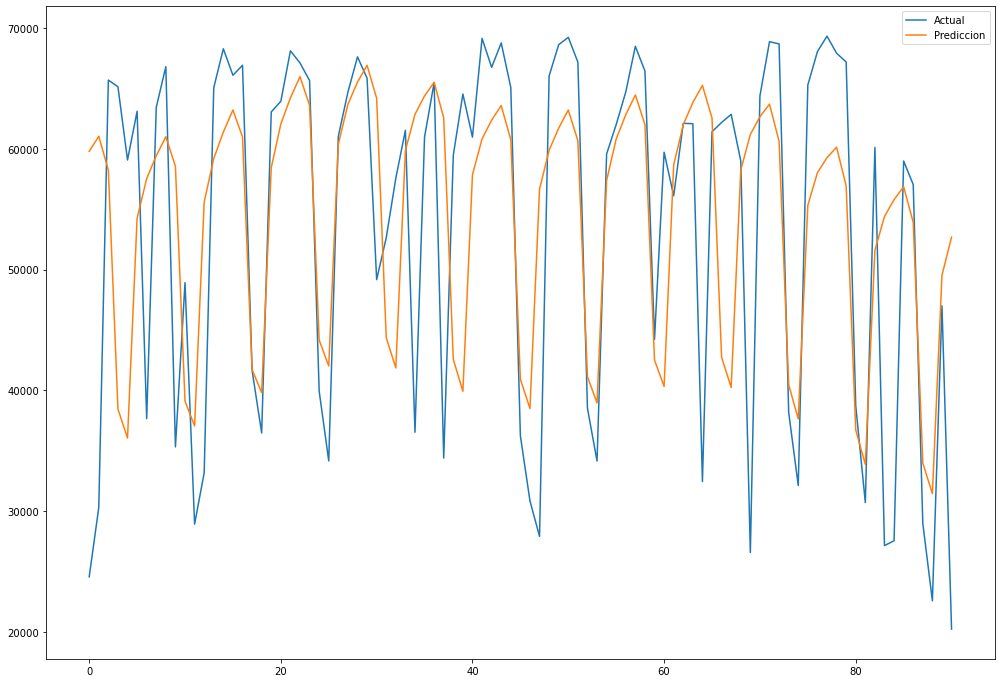

In [81]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Prediccion')
pyplot.legend()
pyplot.show()

## Conclusiones Finales:

#### Analisis de modelos: Tanto el modelo KSforecast como el modelo de Prophet , dan los mismos resultado y tienen las mismas dispersiones respecto a RMSE y r2.  
#### XGBoost fue levemente mejor a nivel de r2 lo cual nos da la posibilidad de que el mismo reacciones mejor a valores no vistos. 
#### Entonces el modelo utilizado en el trabajo inicial de seri de tiempo (RandomForestRegressor) tanto como los modelos nuevos utilizados tuvieron resultados levemente menos a CGBoost, siendo este ultimo el que mejor prerformo con este dataset.
#### Analisis de Resultados: teniendo los resultados de las pruebas podemo decir que deberemos trabajar aun mas sobre los datos de entrada si queremos tener mejor performance de los modelos, recordamos que "Garbage in, Garbage out"

Nota importante, vemos que la performance a nivel "costo computacional" de skforecast es muy superior al resto de los modelos, lo que podria ubicarlo ultimo en la lista de modelos para seleccionar.
Por otro lado , vemos que la performance y simplicidad de Prophet es mucho mejor y rapido a la hora de avanzar con el procesamiento.

### Referencias:

Forecasting series temporales con Python y Scikit-learn -> SKFORECAST:

https://www.cienciadedatos.net/documentos/py27-forecasting-series-temporales-python-scikitlearn.html
https://github.com/JoaquinAmatRodrigo/skforecast/blob/master/notebooks/notebooks_for_docs/tuning_forecaster.ipynb

Time Series Forecasting With Prophet in Python -> Prophet:

https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/